Figure for password project

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob, re
%matplotlib inline

#https://pypi.python.org/pypi/googletrans
#Googletrans is licensed under the MIT License
from googletrans import Translator

# Used valuable web references used in getting the subplots together for this work
# https://stackoverflow.com/questions/34933905/matplotlib-adding-subplots-to-a-subplot
# https://matplotlib.org/examples/pylab_examples/demo_tight_layout.html
# https://www.python-course.eu/matplotlib_multiple_figures.php

In [2]:
# to ease the unicode-utf-8 pain
# https://stackoverflow.com/questions/9942594/unicodeencodeerror-ascii-codec-cant-encode-character-u-xa0-in-position-20
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [3]:
#parameters for own use
addin = '_combo' #used in fig storing

#re for getting the resource names
sourceid = r"(?<=freqs\_).*?(?=\.csv)" # return string between freqs_ and .csv

#read the data in
df = pd.DataFrame()
sources = [filename for filename in glob.glob("C:\Users\elmasyr\Seafile\PW Project\*freq*.csv")]
for source in sources:
    s = re.search(sourceid, source).group()
    print s #check
    dfnew = pd.read_csv(source, header=0, sep=',')  
    dfnew['source'] = s
    df = pd.concat([df, dfnew])

In [4]:
df.sample(5)

,word,pwfreq,webfreq,source
7,camaro,47,445,overdrive
1,kissa,954,54393,all
8,nalle,76,8667,78k
12,liini,116,104,helistin
4,nalle,270,8667,alypaa


## English translation dictionary

In [5]:
#define traslator
tr = Translator()

In [6]:
# quick test, should result 'cat'
print tr.translate('kissa', src='fi', dest='en').text

In [7]:
# dictionary for English translations
trdict = {}

In [8]:
# define pronouns, which will not be translated, 
# but presented by starting with a capital letter
# only pronouns presented in the result picture are included
pronouns = ['johanna', 'antti', 'ville', 'emilia', 'anna', 
           'anne', 'anni', 'napsu', 'volvo', 'älypää',
           'kari', 'mersu', 'chevy', 'dodge','ford', 'seta']

In [9]:
# pronouns to title form
trdict = dict((w.decode('utf-8'), w.decode('utf-8').title()) for w in df[df.word.isin(pronouns)].word)

In [10]:
trdict.update((w, tr.translate(w, src='fi', dest='en').text) for w in df[~df.word.isin(pronouns)].word)

In [11]:
# test
trdict['kissa']

u'cat'

In [12]:
# one test function
def pw_fig(xdf, sample, source, figsize=(10,4)):
    fign = 'wordfreq15'
    pngfile = fign + '_' + addin + 'png'
    epsfile = fign + '_' + addin + 'eps'
    
    mydf=xdf[xdf.source==source][:sample].reset_index(drop=True)
    pos = list(range(len(mydf)))
    width = 0.25
    
    fig, ax1 = plt.subplots(figsize=figsize)
    x = [i for i in mydf.index]
    x_ticks_labels = [str(i).decode('utf-8') for i in mydf.word]
#     x_ticks_labels2 = [trdict[i] for i in mydf.word]
#     x_ticks_labels2 = [str(i).decode('utf-8')+'\n'+trdict[i]. for i in mydf.word]
    y1 = mydf.pwfreq
#     print len(x), len(y1)
    ax1.plot(x, y1, 'b-')
    #ax1.set_xlabel('words')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('freq in pws', color='b')
    ax1.tick_params('y', colors='b')
    # Set number of ticks for x-axis
    ax1.set_xticks(x)
    # Set ticks labels for x-axis
    ax1.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

    ax2 = ax1.twinx()
    y2 = mydf.webfreq
    ax2.plot(x, y2, 'g--')
    ax2.set_ylabel('freq in web', color='g')
    ax2.tick_params('y', colors='g')
    
    for idx, word in enumerate(mydf.word):
        
        ax1.text(-0.12+((1./(sample-0.6))*(idx+1)), - 0.2, trdict[word.decode('utf-8')].decode('utf-8'),
            transform=ax1.transAxes, color='black', style='italic',
                 fontsize=12, rotation='vertical')

#     ax1.text(1, - 0.2, trdict['koira'],
# #         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax1.transAxes,
#         color='black', fontsize=12, rotation='vertical')

#     ax2.set_xticks([p + 1.5 * width for p in pos])
#     ax2.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)
    
    fig.tight_layout();


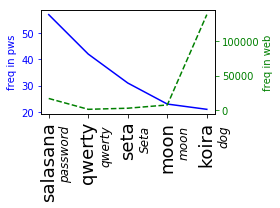

In [13]:
#test
pw_fig(df, 5, 'seta', figsize=(4,3));

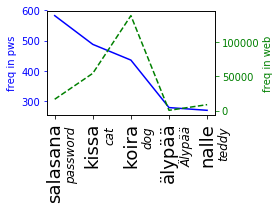

In [14]:
#test
pw_fig(df, 5, 'alypaa', figsize=(4,3));

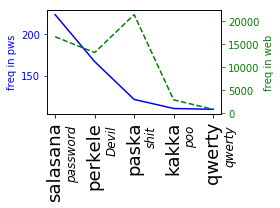

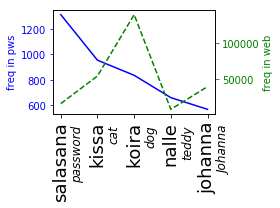

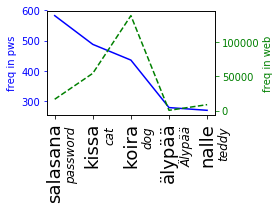

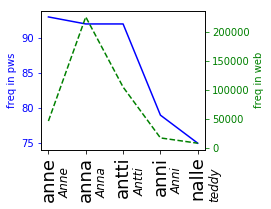

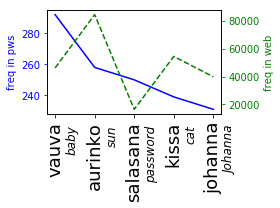

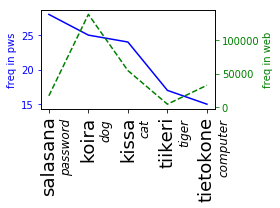

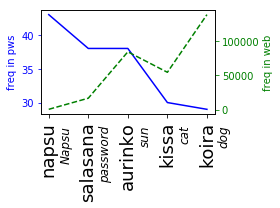

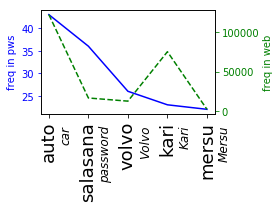

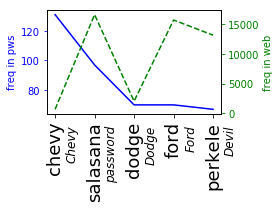

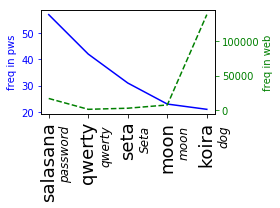

In [15]:
#check that all is in
for source in df.source.unique():
    pw_fig(df, 5, source, figsize=(4,3));

In [16]:
#list sources, exclude 'all
sourcelist = [i for i in df.source.unique() if 'all' not in i]

In [17]:
#split to groups of three
sourcelist = [sourcelist[i:i+3] for i  in range(0, len(sourcelist), 3)]

In [18]:
sourcelist

[['78k', 'alypaa', 'ano'],
 ['helistin', 'hotmail', 'napsu'],
 ['netcar', 'overdrive', 'seta']]

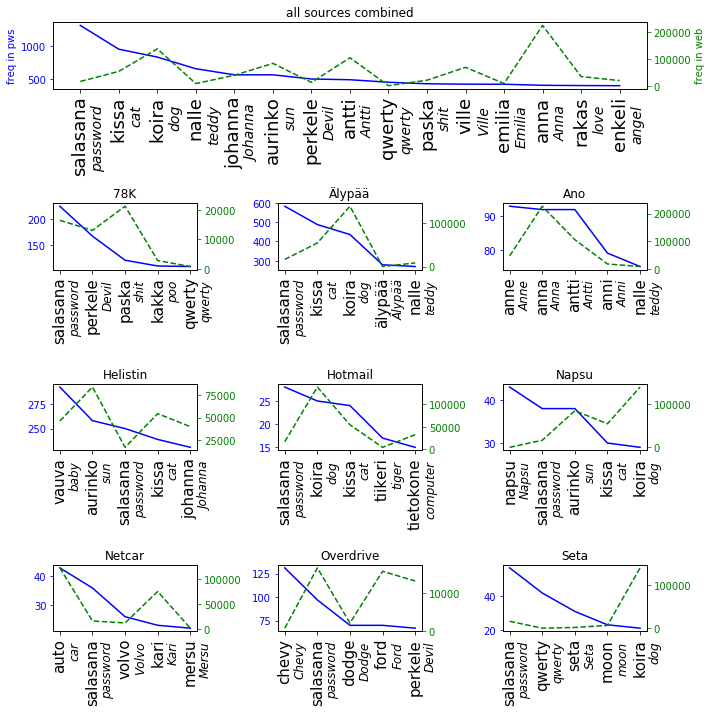

In [19]:
plt.figure(figsize=(10, 10))

sample = 5
ncols = 3
nrows = 3

gs = gridspec.GridSpec(nrows+1, ncols)

# first axis with all data
ax01 = plt.subplot(gs[0, :])
x = [i for i in df[df.source=='all'][:15].index]
x_ticks_labels = [str(i).decode('utf-8') for i in df[df.source=='all'].word[:15]]
y1 = df[df.source=='all'].pwfreq[:15]
ax01.plot(x, y1, 'b-')

# Make the y-axis label, ticks and tick labels match the line color.
ax01.set_ylabel('freq in pws', color='b')
ax01.tick_params('y', colors='b')
# Set number of ticks for x-axis
ax01.set_xticks(x)
# Set ticks labels for x-axis
ax01.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)
ax01.set_title('all sources combined');

ax02 = ax01.twinx()
y2 = df[df.source=='all'].webfreq[:15]
ax02.plot(x, y2, 'g--');
ax02.set_ylabel('freq in web', color='g')
ax02.tick_params('y', colors='g');

for idx, word in enumerate(df[df.source=='all'].word[:15]):
    ax01.text(-0.001+((1/15.4)*(idx+1)), - 0.4, trdict[word].decode('utf-8'),
             transform=ax01.transAxes, color='black', style='italic',
             fontsize=14, rotation='vertical')
#build the subplots per rows and columns
for row in range(nrows):
    for col in range(ncols):
        source = sourcelist[row][col]
        # this starts from row 2, so need to add 1
        ax = plt.subplot(gs[row+1, col])
        x = [i for i in df[df.source==source][:sample].index]
        x_ticks_labels = [str(i).decode('utf-8') for i in df[df.source==source].word[:sample]]
        y1 = df[df.source==source].pwfreq[:sample]
        ax.plot(x, y1, 'b-')

        # Make the y-axis label, ticks and tick labels match the line color.
        # ax.set_ylabel('freq in pws', color='b') #not used in subplots
        ax.tick_params('y', colors='b')
        # Set number of ticks for x-axis
        ax.set_xticks(x)
        # Set ticks labels for x-axis
        ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=15)
        ax.set_title(str(source).title().replace('Alypaa','Älypää'));

        # secondary sub plot
        ax2 = ax.twinx()
        y2 = df[df.source==source].webfreq[:sample];
        ax2.plot(x, y2, 'g--');
        # ax2.set_ylabel('freq in web', color='g') #not used in subplots
        ax2.tick_params('y', colors='g');
        
        for idx, word in enumerate(df[df.source==source][:sample].word):
            ax.text(-0.12+((1./(sample-0.6))*(idx+1)), - 0.3, trdict[word.decode('utf-8')].decode('utf-8'),
            transform=ax.transAxes, style='italic',
            color='black', fontsize=12, rotation='vertical')

plt.tight_layout();
plt.savefig('wordfreqs_combo.png', format='png', dpi=300)
#save the fig in requested formats
fign = 'wordfreqs2'
pngfile = fign + '_' + addin + '.png'
epsfile = fign + '_' + addin + '.eps'
plt.savefig(pngfile, format='png', dpi=300)
plt.savefig(pngfile, format='eps', dpi=300);

In [20]:
%load_ext version_information
%version_information glob, pandas, matplotlib, re

Software versions
Python 2.7.14 64bit [MSC v.1500 64 bit (AMD64)]
IPython 5.5.0
OS Windows 10 10.0.14393
glob The 'glob' distribution was not found and is required by the application
pandas 0.22.0
matplotlib 2.0.2
re 2.2.1
Mon Feb 19 16:35:15 2018 FLE Standard Time

In [21]:
!jupyter --version